In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Let's first import the sheet as a dataframe

df = pd.read_excel("C://Users//Juan Diego//Documents//Data Analyst-Data Scientist//Data projects//Glovo//Data_sample.xlsx", sheet_name="Data sample city N weekly order", \
                   parse_dates=["activation_time_local", "last_courier_assigned_time",\
                "courier_started_order_local", "courier_enters_pickup_time_local",\
                    "pickup_time_local", "courier_enters_delivery_point_time_local", "termination_time"])

In [3]:
# Now, let's check the datatypes of the columns and how the df looks like

df.head()
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        2471 non-null   int64         
 1   final_status                              2471 non-null   object        
 2   store_address_id                          2440 non-null   float64       
 3   customer_id                               2471 non-null   int64         
 4   courier_id                                2471 non-null   int64         
 5   vertical                                  2471 non-null   object        
 6   is_food                                   2471 non-null   bool          
 7   transport                                 2471 non-null   object        
 8   number_of_assignments                     2471 non-null   int64         
 9   total_real_distance           

id                                                   int64
final_status                                        object
store_address_id                                   float64
customer_id                                          int64
courier_id                                           int64
vertical                                            object
is_food                                               bool
transport                                           object
number_of_assignments                                int64
total_real_distance                                float64
activation_time_local                       datetime64[ns]
last_courier_assigned_time                  datetime64[ns]
courier_started_order_local                 datetime64[ns]
courier_enters_pickup_time_local            datetime64[ns]
pickup_time_local                           datetime64[ns]
courier_enters_delivery_point_time_local    datetime64[ns]
termination_time                            datetime64[n

In [6]:
# We need to transform some columns to objects, others to category, and others to integers

l1 = ["id", "store_address_id", "customer_id", "courier_id"]

df.final_status.unique()
df.vertical.unique()
df.is_food.unique()
df.transport.unique()

l2 = ["final_status", "vertical", "is_food", "transport"]

for i in l1:
    df[i] = df[i].astype("object")
    
for i in l2:
    df[i] = df[i].astype("category")

df["number_of_assignments"] = df["number_of_assignments"].astype("int64")

df.dtypes

id                                                  object
final_status                                      category
store_address_id                                    object
customer_id                                         object
courier_id                                          object
vertical                                          category
is_food                                           category
transport                                         category
number_of_assignments                                int64
total_real_distance                                float64
activation_time_local                       datetime64[ns]
last_courier_assigned_time                  datetime64[ns]
courier_started_order_local                 datetime64[ns]
courier_enters_pickup_time_local            datetime64[ns]
pickup_time_local                           datetime64[ns]
courier_enters_delivery_point_time_local    datetime64[ns]
termination_time                            datetime64[n

In [7]:
''' A) Based on the data you were given, provide visibility over the following metrics:'''

''' a) Customer Delivery Time. How long the customer waited for the order'''

df.rename(columns = {"Total Time" : "total_time"}, inplace=True)

# Let's have a dataframe for orders that were not canceled, and other that were.
# For question a), I will use the dataframe of not canceled orders

df_ok = df.loc[df.final_status == "DeliveredStatus", :]
df_can = df.loc[df.final_status == "CanceledStatus", :]

df_ok.total_time.describe()

# We have 2389 orders not canceled. Out of those, the average duration is 30.9 minutes 
# the min duration is 0 minutes, the max duration is 59, and the median is 31 minutes

count    2389.000000
mean       30.906237
std        12.929829
min         0.000000
25%        22.000000
50%        31.000000
75%        40.000000
max        59.000000
Name: total_time, dtype: float64

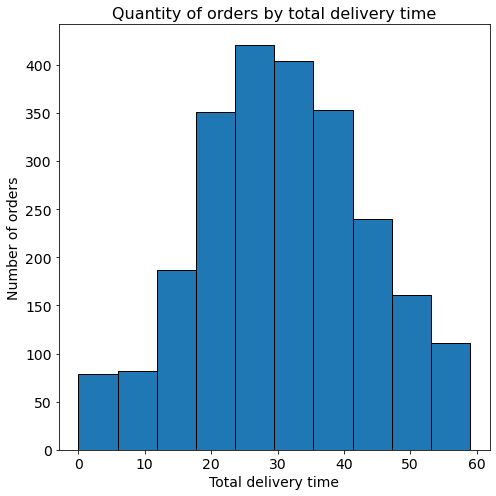

In [72]:
# Making a histogram by delivery time

plt.hist(x="total_time", data=df_ok, edgecolor="black")
plt.title("Quantity of orders by total delivery time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Total delivery time", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
plt.show()

In [73]:
# Defining intervals of time

df_ok["interval"] = pd.cut(df_ok["total_time"], bins=[-2, 10, 20, 30, 40, 50, 60], \
                           labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60"])

df_interval = df_ok.groupby(by="interval", as_index=False).id.count()
df_interval["per_of_total"] = df_interval["id"]/(df_interval["id"].sum())
df_interval["cumsum"] = np.cumsum(df_interval["per_of_total"])

b1 = list((df_interval["id"]))

<ipython-input-73-a68722a90d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok["interval"] = pd.cut(df_ok["total_time"], bins=[-2, 10, 20, 30, 40, 50, 60], \


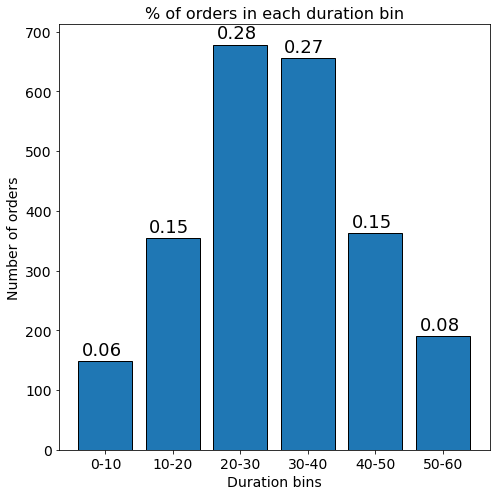

In [74]:
# A bar plot with the distribution of orders by 0-10 min, 10-20 min...

plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

plt.bar(x="interval", height="id", data=df_interval, edgecolor="black")
plt.title("% of orders in each duration bin", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Duration bins", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
for index, value in enumerate(b1):
    plt.text(index-0.35, value+10, str(round(value/2389, 2)), fontsize=18)
plt.show()

In [ ]:
# We can see, for example, that 28% of the orders were fulfilled between 20-30 min, and 27% between 30-40 min.

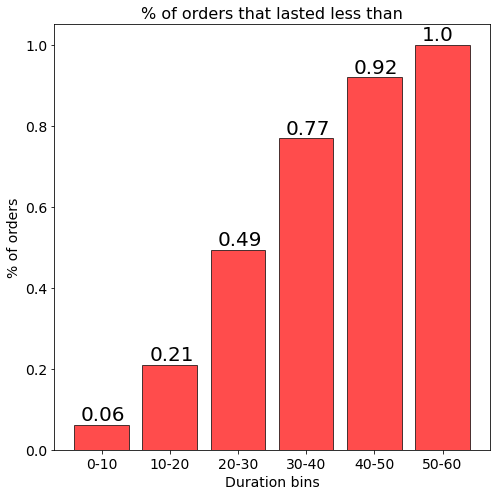

In [11]:
# A bar plot with the cummulated sum of orders (X% of our orders were fulfilled in less than...)

plt.bar(x="interval", height="cumsum", data=df_interval, edgecolor="black", color="red", alpha=0.7)
plt.title("% of orders that lasted less than", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Duration bins", fontsize=14)
plt.ylabel("% of orders", fontsize=14)
for index, value in enumerate(list((df_interval["cumsum"]))):
    plt.text(index-0.3, value+0.01, str(round(value, 2)), fontsize=20)
plt.show()

In [ ]:
# Here, for example, 49% of the orders had a duration of 30 minutes or less, while 77% were of 40 min or less

In [13]:
'''b) Delivery distance: total distance traveled by the couriers. I will also consider canceled orders in this case'''

df.total_real_distance.describe()

count    2471.000000
mean        5.045905
std         2.478414
min         0.708000
25%         3.342000
50%         4.560000
75%         6.132000
max        19.789000
Name: total_real_distance, dtype: float64

In [14]:
# We have 2471 orders in our df. The mean total distance is 5km, the min recorded is 0.7km
# the max is 19km, and the median is 4.56km. How does the boxplot look?

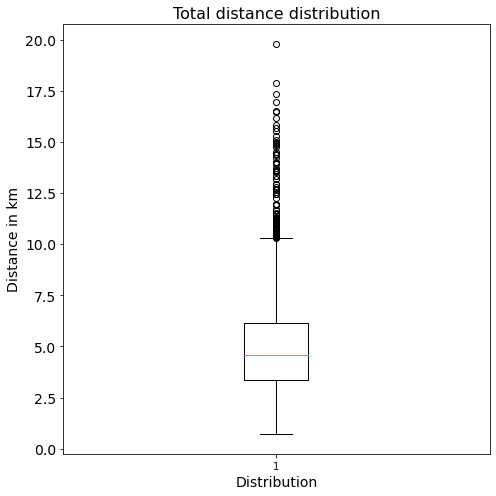

In [15]:
plt.boxplot(df.total_real_distance)
plt.title("Total distance distribution", fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distance in km", fontsize=14)
plt.show()

In [16]:
# We have quite a lot of outliers when analyzing the total distance traveled by couriers
# What happens when the order is canceled? Does this affect the distance traveled?

df_can.total_real_distance.describe()

count    82.000000
mean      5.972037
std       3.361569
min       1.095000
25%       3.883000
50%       5.162500
75%       7.456000
max      17.887000
Name: total_real_distance, dtype: float64

In [17]:
# When the order is canceled (we have 82 of those) the mean distance is 5.97, the min is 1km
# the max is 17km and the median is 5.16km. This means that when an order is canceled, 
# most of the times the courier had more distance than in non-canceled orders (6km avg for canceled vs 5km avg for non-canceled).
# Maybe the reason people cancel is because the courier is very far away and this would
# imply a lot of time to get their delivery? 

# Now I will make a histogram of total real distance in km

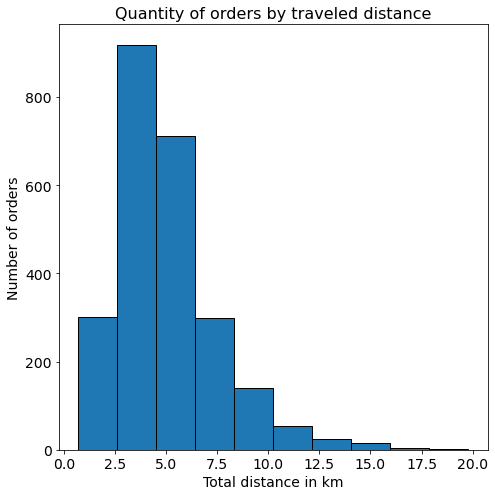

In [18]:
plt.hist(x="total_real_distance", data=df, edgecolor="black")
plt.title("Quantity of orders by traveled distance", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Total distance in km", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
plt.show()

In [19]:
# I will define some intervals of distance and a new dataframe

df["t_intvl"] = pd.cut(df["total_real_distance"], bins=[-1, 2, 4, 6, 8, 10, 12, 14, 25], \
                           labels=["less than 2km", "2km-4km", "4km-6km", "6km-8km", "8-10km", "10km-12km", "12km-14km", "more than 14km"])

df_tint = df.groupby(by="t_intvl", as_index=False).id.count()
df_tint["per_of_total"] = df_tint["id"]/(df_tint["id"].sum())
df_tint["cumsum"] = np.cumsum(df_tint["per_of_total"])

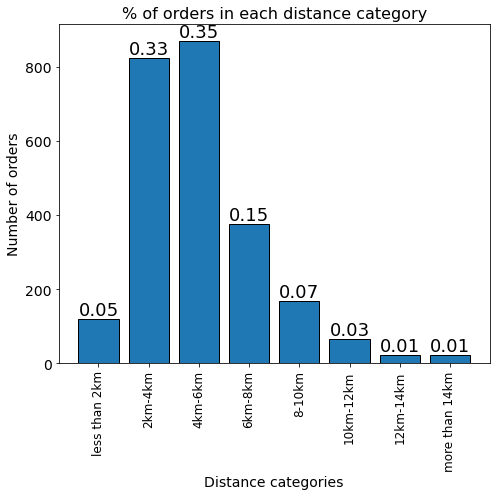

In [20]:
# A bar plot with the distribution of orders by 0-2km, 2km-4km, ...

plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

plt.bar(x="t_intvl", height="id", data=df_tint, edgecolor="black")
plt.title("% of orders in each distance category", fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Distance categories", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
for index, value in enumerate(list(df_tint["id"])):
    plt.text(index-0.4, value+10, str(round(value/2471, 2)), fontsize=18)
plt.show()

In [21]:
# Main finding above: 68% of our orders are between 2km and 6km.

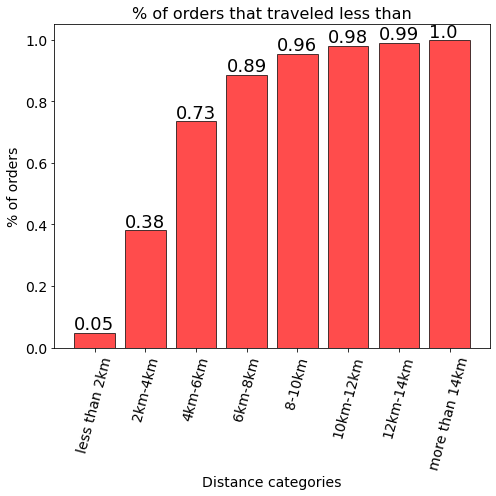

In [22]:
# A bar plot with the cummulated distance (X% of our orders had distance of less than...)

plt.bar(x="t_intvl", height="cumsum", data=df_tint, edgecolor="black", color="red", alpha=0.7)
plt.title("% of orders that traveled less than", fontsize=16)
plt.xticks(fontsize=14, rotation=75)
plt.yticks(fontsize=14)
plt.xlabel("Distance categories", fontsize=14)
plt.ylabel("% of orders", fontsize=14)
for index, value in enumerate(list((df_tint["cumsum"]))):
    plt.text(index-0.4, value+0.01, str(round(value, 2)), fontsize=18)

In [ ]:
# We can pay attention to the fact that 73% of our orders implied 6km or less distance

In [23]:
'''c) Reassignment probability (whenever we need to assign an order to another
courier after the first assignment, that counts as a reassignment)'''

# Let's look at the distribution of these numbers
    
df["number_of_assignments"].describe()

count    2471.000000
mean        1.172805
std         0.480895
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: number_of_assignments, dtype: float64

In [ ]:
# For the distribution of number of assignments (all orders) we see that the mean is 1.17, the min
# is 1, the median is 1, and the max is 6

In [24]:
df_can["number_of_assignments"].describe()

count    82.000000
mean      1.463415
std       0.849039
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: number_of_assignments, dtype: float64

In [ ]:
# For the distribution of number of assignments (canceled orders) we see that the mean is 1.46, the min
# is 1, the median is 1, and the max is 5

In [25]:
# Now I will make a new dataframe to plot the bars, using all the orders (canceled and non-canceled)

df_aint = df.groupby(by="number_of_assignments", as_index=False).id.count()
df_aint["per_of_total"] = df_aint["id"]/(df_aint["id"].sum())
df_aint["cumsum"] = np.cumsum(df_aint["per_of_total"])

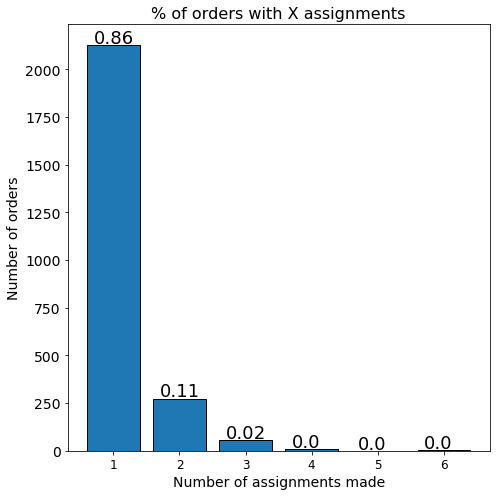

In [26]:
# A bar plot with the distribution of orders by number of assignments they had

plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

plt.bar(x="number_of_assignments", height="id", data=df_aint, edgecolor="black")
plt.title("% of orders with X assignments", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Number of assignments made", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
for index, value in enumerate(list(df_aint["id"])):
    plt.text(index+0.7, value+10, str(round(value/2471, 2)), fontsize=18)
plt.show()

In [27]:
# Main result: 86% of the orders had 1 assignment, and 14% had some kind of reassignment (2,3,4,5 or 6 times)

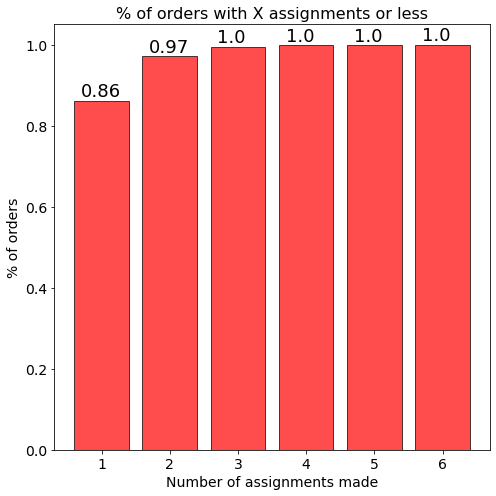

In [28]:
# A bar plot with the cummulated sum (X% of our orders had distance of less than...)

plt.bar(x="number_of_assignments", height="cumsum", data=df_aint, edgecolor="black", color="red", alpha=0.7)
plt.title("% of orders with X assignments or less", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of assignments made", fontsize=14)
plt.ylabel("% of orders", fontsize=14)
for index, value in enumerate(list((df_aint["cumsum"]))):
    plt.text(index+0.7, value+0.01, str(round(value, 2)), fontsize=18)

In [29]:
# Talking about the distribution of the data:
# 86% of the orders have only 1 assignment, 11% have 2, 2% have 3, and the remainder is split between 4, 5 and 6
# 97% of the orders have 2 assignments or less, 99% have 3 assignments or less, and then almost 100% have 4,5,6.

In [ ]:
'''B) Regarding reassignments can you see any trends / correlation between this
metric and any of the dimensions in the dataset?'''

In [36]:
# Number of assignments of orders vs FINAL STATUS OF ORDERS (first non-canceled, then canceled)

df_ok_na = df_ok.groupby(by="number_of_assignments", as_index=False).id.count()
df_ok_na["per_of_total"] = df_ok_na["id"]/(df_ok_na["id"].sum())
df_ok_na

df_can_na = df_can.groupby(by="number_of_assignments", as_index=False).id.count()
df_can_na["per_of_total"] = df_can_na["id"]/(df_can_na["id"].sum())

print(df_ok_na, "\n\n" ,df_can_na)

   number_of_assignments    id  per_of_total
0                      1  2071      0.866890
1                      2   260      0.108832
2                      3    49      0.020511
3                      4     7      0.002930
4                      6     2      0.000837 

    number_of_assignments  id  per_of_total
0                      1  58      0.707317
1                      2  14      0.170732
2                      3   7      0.085366
3                      4   2      0.024390
4                      5   1      0.012195


In [31]:
# We can see that while overall 86% of orders have 1 assignment, 11% have 2 and 2% have 3,
# For canceled orders we have 71%, 17%, 8%. So you could say that maybe orders
# with more reassignments tend to be canceled more (maybe because reassignments mean more time and 
# inconveniences for the customer?) So an order with 2 assignments is more likely to be canceled than one with just 1.

In [37]:
# Number of assignments of orders vs VERTICAL OF THE STORE OF THE ORDER

pd.crosstab(df["number_of_assignments"], df["vertical"], normalize="columns")

vertical,COURIER,QUIERO,WALL - NonPartner,WALL - Partner
number_of_assignments,,,,
1,0.0,0.833333,0.724138,0.863957
2,1.0,0.100000,0.275862,0.108669
3,0.0,0.033333,0.000000,0.022812
4,0.0,0.033333,0.000000,0.003318
5,0.0,0.000000,0.000000,0.000415
6,0.0,0.000000,0.000000,0.000830


In [38]:
# We can observe that there is a significant difference in number of assignments when the store the 
# customer orders from is NonPartner vs the store is Partner. 

# When the store is partner, we see the usual 87%, 11%, 2% split (orders with 1, 2, 3 assignments)

# but when the store is not a Partner we have 72%, 27% (orders with 1, 2 assignments)

# This means that when an order is directed towards a non-partner store, many couriers may decide to abandon the order. 
# Why is this? I would take a guess that because acting as a regular customer and going into the store, sourcing the products, 
# queuing, paying, probably involves more effort and time than when the store has it prepared to you or assists you. 
# This is why many couriers opt out of orders for non-partner stores and then these orders have to be reassigned.

In [39]:
# Number of assignments of orders vs FOOD AND NON-FOOD ORDERS

pd.crosstab(df["number_of_assignments"], df["is_food"], normalize="columns")

is_food,False,True
number_of_assignments,,
1,0.800000,0.863789
2,0.176471,0.108550
3,0.011765,0.023051
4,0.011765,0.003353
5,0.000000,0.000419
6,0.000000,0.000838


In [40]:
# A little bit of evidence here: when the order is food, we have 86%, 10% and 2% (orders with 1,2,3 assignments)
# while when it isn't food, we have 80%, 18%, 1% (orders with 1,2,3 assignments). Meaning, we have more 
# orders that are reassigned. Probably because when it isn't food it requires an extra effort to pick it up? 
# Or maybe because it means less income for couriers?

In [41]:
# Number of assignments of orders vs MEANS OF TRANSPORTATION

pd.crosstab(df["number_of_assignments"], df["transport"], normalize="columns")

transport,BICYCLE,CAR,MOTORBIKE
number_of_assignments,,,
1,0.873307,0.827423,0.861286
2,0.103586,0.122931,0.116015
3,0.019124,0.044917,0.016393
4,0.002390,0.004728,0.005044
5,0.000000,0.000000,0.001261
6,0.001594,0.000000,0.000000


In [42]:
# We do not find any significant difference here for the number of reassignments with different transportation means

In [43]:
# Number of assignments of orders vs TOTAL DISTANCE COVERED BY THE COURIER

asgn_vs_dist = pd.crosstab(df["number_of_assignments"], df["t_intvl"], normalize="columns")
asgn_vs_dist

t_intvl,less than 2km,2km-4km,4km-6km,6km-8km,8-10km,10km-12km,12km-14km,more than 14km
number_of_assignments,,,,,,,,
1,0.924370,0.883636,0.862227,0.821809,0.846154,0.815385,0.73913,0.739130
2,0.050420,0.099394,0.111366,0.138298,0.124260,0.123077,0.26087,0.086957
3,0.016807,0.014545,0.022962,0.031915,0.023669,0.061538,0.00000,0.086957
4,0.000000,0.001212,0.002296,0.007979,0.005917,0.000000,0.00000,0.086957
5,0.008403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.001212,0.001148,0.000000,0.000000,0.000000,0.00000,0.000000


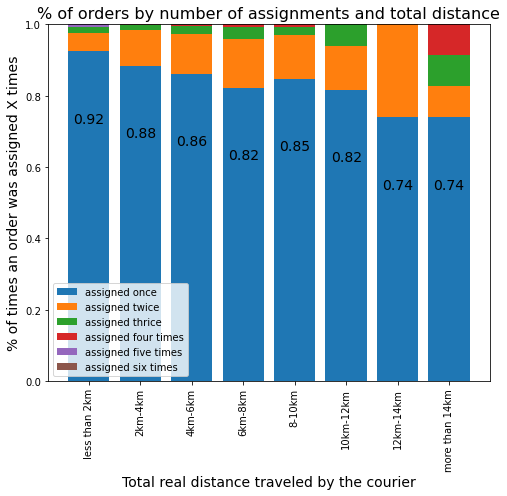

In [44]:
# Here we found gold. Let's try to visualize this relationship so it is clearer.

df["t_intvl"]=pd.Categorical(df["t_intvl"], ["less than 2km", "2km-4km", "4km-6km", "6km-8km", "8-10km", "10km-12km", "12km-14km", "more than 14km"])

labels = ["less than 2km", "2km-4km", "4km-6km", "6km-8km", "8-10km", "10km-12km", "12km-14km", "more than 14km"]
first = list(asgn_vs_dist.iloc[0, :])
second = list(asgn_vs_dist.iloc[1, :])
third = list(asgn_vs_dist.iloc[2, :])
fourth = list(asgn_vs_dist.iloc[3, :])
fifth = list(asgn_vs_dist.iloc[4, :])
sixth = list(asgn_vs_dist.iloc[5, :])

fig, ax = plt.subplots()

ax.bar(labels, first, label='assigned once')
ax.bar(labels, second, bottom=first,
       label='assigned twice')
ax.bar(labels, third, bottom=np.array(first)+np.array(second),
       label='assigned thrice')
ax.bar(labels, fourth, bottom=np.array(first)+np.array(second) + np.array(third),
       label='assigned four times')
ax.bar(labels, fifth, bottom=np.array(first)+np.array(second) + np.array(third) + np.array(fourth),
       label='assigned five times')
ax.bar(labels, sixth, bottom=np.array(first)+np.array(second) + np.array(third) + np.array(fourth) + np.array(fifth),
       label='assigned six times')

ax.set_ylabel('% of times an order was assigned X times', fontsize=14)
ax.set_xlabel("Total real distance traveled by the courier", fontsize=14)
ax.set_title("% of orders by number of assignments and total distance", fontsize=16)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
for index, value in enumerate(first):
    ax.text(index-0.3, value-0.2, str(round(value, 2)), fontsize=14)
ax.legend()
plt.show()

In [45]:
# We can discern on the figure how, as the total travel distance for the courier becomes greater,
# the % of orders that only have 1 assignment decline consistently,
# While especially the % of orders with 2 assignments becomes ever more important
# Therefore, I would state that the distance the courier has to travel to make the delivery
# affects greatly whether he chooses to reject that order or not. As mentioned above, as the
# distance increases, so does the probability of reassignment by couriers.

In [46]:
# Number of assignments of orders vs DIFFERENT DAYS OF THE WEEK

df["wday"] = df.activation_time_local.dt.strftime("%A")

df["wday"] = df.wday.astype("category")
df["wday"] = pd.Categorical(df.wday, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

pd.crosstab(df["number_of_assignments"], df["wday"], normalize="columns")

wday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
number_of_assignments,,,,,,,
1,0.882550,0.828070,0.853234,0.886288,0.878698,0.862288,0.843501
2,0.083893,0.147368,0.111940,0.086957,0.106509,0.110169,0.127321
3,0.030201,0.021053,0.029851,0.026756,0.011834,0.019068,0.021220
4,0.003356,0.003509,0.004975,0.000000,0.002959,0.006356,0.002653
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002653
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.002119,0.002653


In [47]:
# Nothing particular here! They look quite similar. The day of the week, at least in this dataset
# does not appear to really influence the number of assignments orders have

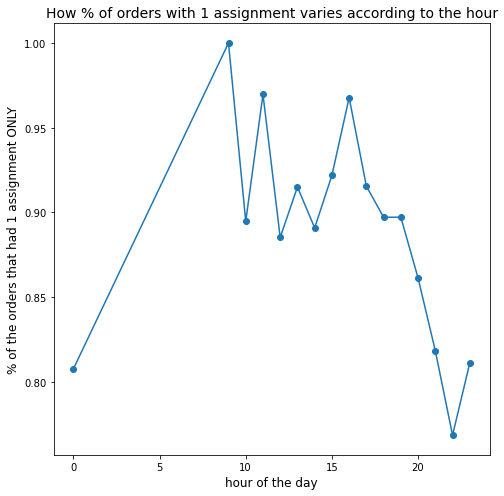

In [48]:
# Number of assignments of orders vs DIFFERENT HOURS OF THE DAY

df["hour"] = df.activation_time_local.dt.hour

as_per_hour = pd.crosstab(df["number_of_assignments"], df["hour"], normalize="columns")
x=list(as_per_hour.columns)
y=list(as_per_hour.iloc[0, :])

plt.plot(x, y, marker="o")
plt.xlabel("hour of the day", fontsize=12)
plt.ylabel("% of the orders that had 1 assignment ONLY", fontsize=12)
plt.title("How % of orders with 1 assignment varies according to the hour", fontsize=14)
plt.show()

In [49]:
# We can see in the graph above that the hour of the day has a relationship with the number of assignments:
# The number of orders with only 1 assignments drops massively from 19hs onwards (20, 21, 22, 23), which
# I would venture and say is because of the exploding demand for dinner or groceries in the app, which could mean
# that there is a lot of work for couriers and so they can be more "picky" with the orders they decide 
# to take up, choosing the most "comfortable" or "convenient" option for them (does not
# have to be exactly the closest, other criteria could be at play). 
# This is an explanation I came up with, there could be others.

In [51]:
'''C) Once the courier arrives at the store, the time until the order is picked-up
(waiting_time_at_pickup), can present high variation. With the data given,
present an analysis showcasing this.'''

'C) Once the courier arrives at the store, the time until the order is picked-up\n(waiting_time_at_pickup), can present high variation. With the data given,\npresent an analysis showcasing this.'

In [52]:
# Let's first generate the column that will tell us how much time passes from the moment a courier is within 100m
# of the store to the moment in which he has the required items

df["wait_time"] = (df["pickup_time_local"] - df["courier_enters_pickup_time_local"]).dt.total_seconds()/60

df["wait_time"].isnull().sum()

61

In [53]:
# For the analysis of wait_time, I will get rid of the 61 rows with null values, as 
# all of them correspond to CanceledStatus orders. Work with a new df

df_w = df.dropna(axis=0, subset=["wait_time"])
df_w["wait_time"].isnull().sum()

0

In [54]:
# We have gotten rid of the null values for wait time. Now let's take a look at the distribution

df_w["wait_time"].describe()

count    2410.000000
mean       15.244315
std        12.798476
min        -1.833333
25%         7.050000
50%        11.683333
75%        18.700000
max        87.233333
Name: wait_time, dtype: float64

In [55]:
# We can see that (in minutes), the mean waiting time is 15.24 minutes, the standard deviation is 12.8 (which is around 84% 
# of the mean!) the min waiting time was -1.8 (?), the median is 11.7 minutes, and the max waiting time was 87 minutes
# or 1h 27minutes.

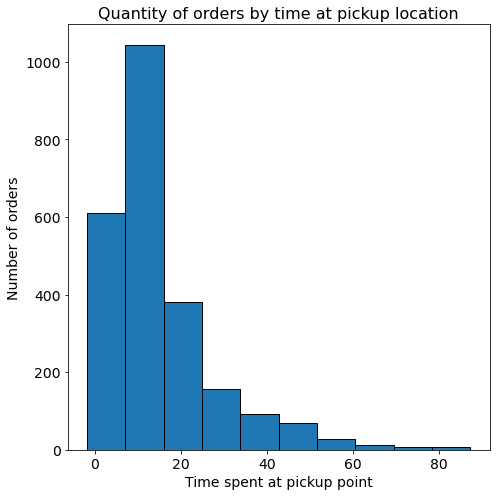

In [56]:
plt.hist(x="wait_time", data=df_w, edgecolor="black")
plt.title("Quantity of orders by time at pickup location", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time spent at pickup point", fontsize=14)
plt.ylabel("Number of orders", fontsize=14)
plt.show()

In [57]:
# We can see this variability already in the histogram: waiting time can be anything
# between 1 minute and 80 minutes!

# How about a boxplot to identify how heavy the distribution is in outliers?

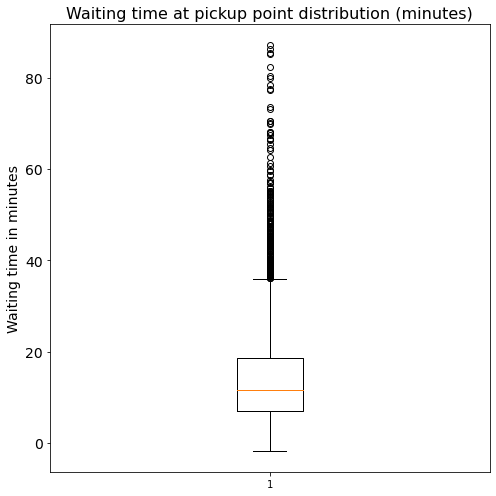

In [58]:
plt.boxplot(df_w.wait_time)
plt.title("Waiting time at pickup point distribution (minutes)", fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel("Waiting time in minutes", fontsize=14)
plt.show()

In [59]:
# Here it is even more clear, look at the quantity of outliers in this distribution!
# Clearly, the waiting time at the pickup point has a huge variability, and we have proved it.

In [60]:
'''C) Can you identify any clear trends in terms
of worst offenders? What could be the possible causes when the courier is
waiting for a very long time before picking up the order?'''

'C) Can you identify any clear trends in terms\nof worst offenders? What could be the possible causes when the courier is\nwaiting for a very long time before picking up the order?'

In [61]:
# Now, the second part of the question: What could be some possible causes for long wait time
# at the pickup point? I have the wait time benchmark of all orders to compare, 
# but I will take a closer look at the following variables:
# the specific store, the vertical of the store, whether the order is food or not, day of the week and hour of the day.

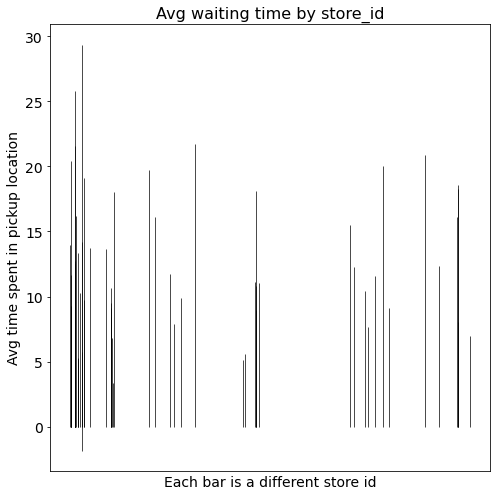

In [62]:
# The specific store affects pickup time?

df_w.columns
df_st=df_w.groupby(by="store_address_id", as_index=False).wait_time.mean().sort_values(by="wait_time", ascending=False)

plt.bar(x="store_address_id", height="wait_time", data=df_st, edgecolor="black", color="purple", alpha=0.7)
plt.title("Avg waiting time by store_id", fontsize=16)
plt.yticks(fontsize=14)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel("Each bar is a different store id", fontsize=14)
plt.ylabel("Avg time spent in pickup location", fontsize=14)
plt.show()

In [63]:
# We can take note of the fact that the average waiting time is different for different
# store ids: we do not know why exactly, but it is a fact that certain stores influence negatively
# the amount of time couriers spend there. Could be various reasons why this happens, perhaps
# we could ask the couriers who most frequent the worst stores id in terms of wait time
# why do they think this happens and if they can identify the problem with those specific stores?

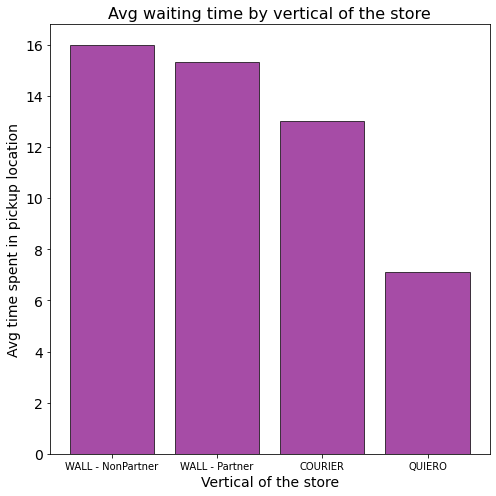

In [64]:
# Looking at the vertical field

df_vt=df_w.groupby(by="vertical", as_index=False).wait_time.mean().sort_values(by="wait_time", ascending=False)

plt.bar(x="vertical", height="wait_time", data=df_vt, edgecolor="black", color="purple", alpha=0.7)
plt.title("Avg waiting time by vertical of the store", fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Vertical of the store", fontsize=14)
plt.ylabel("Avg time spent in pickup location", fontsize=14)
plt.show()

In [65]:
# To pay attention to in the above plot: the orders with vertical QUIERO lead
# to considerably avg lower wait time in the pickup location. Then, we have some subtle 
# differences between Partner and NonPartner, and COURIER (which is not on the description of the exercise)
# has significantly lower avg waiting times than WALL - p and WALL - np.
# All in all, it seems that if the vertical of the order is QUIERO, the avg wait time at
# the pickup location is sensibly smaller! 

C:\Users\Juan Diego\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


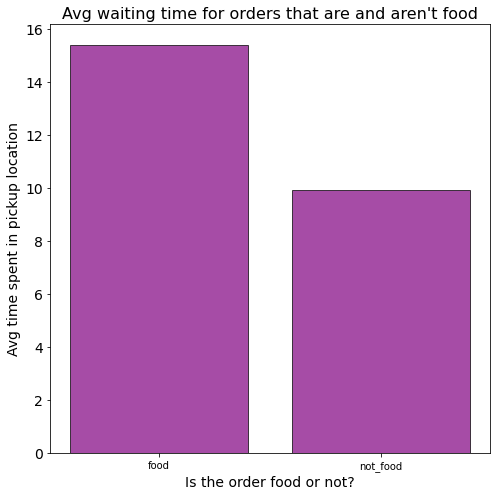

In [66]:
# Whether the order is food or not?

df_w.is_food.replace({True : "food", False : "not_food"}, inplace=True)

df_fd = df_w.groupby(by="is_food", as_index=False).wait_time.mean().sort_values(by="wait_time", ascending=False)

plt.bar(x="is_food", height="wait_time", data=df_fd, edgecolor="black", color="purple", alpha=0.7)
plt.title("Avg waiting time for orders that are and aren't food", fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Is the order food or not?", fontsize=14)
plt.ylabel("Avg time spent in pickup location", fontsize=14)
plt.show()

In [67]:
# Here it is apparent as well: orders that are food make the courier spend more time
# at the pickup location, most likely because the order is still in preparation, or
# they are very busy cooking and handing out other orders for delivery. It would seem much
# faster (and it is, looking at the data) for a courier to pickup say, some cookies 
# from the store and get going, than wait for food at a restaurant. This makes sense
# and ultimately, if the order involves food, then on avg couriers spend more time at 
# the pickup location.

<ipython-input-68-b4b31105187e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w["wday"] = pd.Categorical(df_w.wday, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


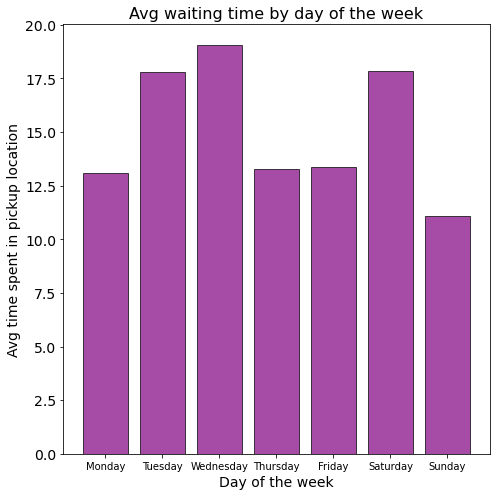

In [68]:
# Does the day of the week affect the avg waiting time at the pickup location?

df_w["wday"] = pd.Categorical(df_w.wday, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_wd = df_w.groupby(by="wday", as_index=False).wait_time.mean()

plt.bar(x="wday", height="wait_time", data=df_wd, edgecolor="black", color="purple", alpha=0.7)
plt.title("Avg waiting time by day of the week", fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Day of the week", fontsize=14)
plt.ylabel("Avg time spent in pickup location", fontsize=14)
plt.show()

In [69]:
# Yes, it does. We can almost define 3 categories for days of the week (at least in this dataset).

# On sunday, the avg wait time is the shortest, around 11 minutes.

# Then on monday, thursday and friday, we have around 13 minutes of wait time.

# Finally, on tuesday, wednesday and saturday the wait time is around 18-19 minutes

# So then, we can conclude (probably because of different demand in different days of the
# week or other circumstances), that the weekday in which an order is placed might 
# tell you something about what kind of wait time to expect.

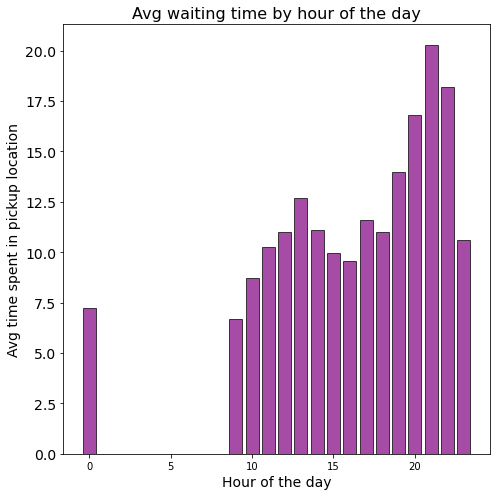

In [70]:
# Does the hour of the day affect the avg waiting time?

df_h = df_w.groupby(by="hour", as_index=False).wait_time.mean()

plt.bar(x="hour", height="wait_time", data=df_h, edgecolor="black", color="purple", alpha=0.7)
plt.title("Avg waiting time by hour of the day", fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Avg time spent in pickup location", fontsize=14)
plt.show()

In [71]:
# Again, it is evident that the hour of the day in which an order is placed has some
# kind of relationship with the waiting time at the pickup location for the courier. The avg waiting time
# varies a lot throughout the different hours, having a peak (in the first half of the day)
# at 13hs (which, surprise surprise, it's lunch time), and then, when the evening comes
# around we see 3 separate peaks at 20, 21, 22hs, which is also dinnertime for people
# with different schedules. This is what you would expect if food delivery is a big part of the operation:
# kitchens and restaurants are much busier around lunch and dinnertime, which would 
# create a bottleneck and delay cooking, service and processes 
# (because of people ordering and people also eating there, queues, etc.)